# Dash/Gap Array and Dash Offset for `linetype`

A new way to specify the `linetype`:

- array, defining the pattern of dashes and gaps used to draw the line: \[dash, gap, dash, gap, ...\]
- array with specified offset: \[offset, \[dash, gap, dash, gap, ...\]\]
- string of an even number (up to eight) of hexadecimal digits which give the lengths in consecutive positions in the string
            
For example,
 - \[5, 10, 1, 15\] means 5px dash, 10px gap, 1px dash, 15px gap without offset
 - \[5, \[10, 1\]\] means 10px dash, 1px gap, but skip the first 5px
 - "5515" means 5px dash, 5px gap, 1px dash, 5px gap

In [1]:
import pandas as pd

from lets_plot import *


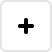
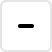
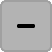
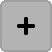
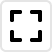
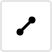
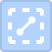
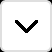
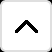
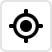
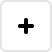
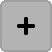
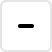
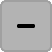
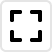
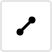
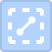
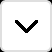
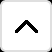
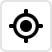

In [2]:
LetsPlot.setup_html()

In [3]:
def plot_linetypes(line_types):
    n = len(line_types)
    data = {
        'x': [0] * n,
        'xend': [1] * n,
        'y': line_types,
        'yend': line_types,
        'linetype': line_types
    }
    return ggplot(data) + \
            geom_segment(aes(x='x', xend='xend', y='y', yend='yend',
                         linetype='linetype'),
                         tooltips='none') + \
            scale_linetype_identity()

#### Use Dash Arrays 

In [4]:
line_types = [
    [1, 1],               # dotted
    [5, 5],               # dashed
    [10, 5],              # long dashed
    [5, [10, 5]],         # long dashed with offset
    [5, 10, 1, 10],       # dashdotted
    [10, 5, 1, 5, 1, 5],  # dashdotdotted
]

plot_linetypes(line_types)

#### Use String of HEX Digits

In [5]:
hex_line_types = [
    "11",
    "55",
    "A5",
    "5A1A"
]

plot_linetypes(hex_line_types)

### Use in `element_line()`

In [6]:
ggplot() + \
    geom_blank() + \
    theme_bw() + \
    theme(panel_grid = element_line(linetype=[5, [10, 5]], color='grey'))

### On livemap

In [7]:
from lets_plot import tilesets

data2 = {
    'lon': [-73.7997, 14.418540],
    'lat': [40.6408, 50.073658],
}
ggplot(data2, aes(x='lon', y='lat')) + \
    geom_livemap(tiles=tilesets.LETS_PLOT_DARK) + \
    geom_path(geodesic=True, color='white', linetype=[10, 5])
